# Assignment 1



In [ ]:
student = {
    'name' : "Nursen" ,
    'surname' : "Tore",
    'studentNumber' : "2425171"
}

print(student)

{'name': 'Nursen', 'surname': 'Tore', 'studentNumber': '2425171'}


## Part I: Classification Problem
1. The ”IBM HR Analytics Employee Attrition Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset
characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]
4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical
variables, feature scaling, and any other technique that could improve the
results. [5 points]
5. Implement 5-Fold Cross Validation to assess the robustness of your models.
This approach ensures that the evaluation of your model is as accurate as
possible. [5 points]
6. Develop and evaluate models using K-Nearest Neighbors (KNN), Naive
Bayes, Perceptron, and Logistic Regression algorithms. Document the
performance of each model. [30 points]
7. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]
8. Discuss the results. Reflect on which model yielded the best performance
and hypothesize why this might be the case. Consider the algorithm’s suitability for the data distribution, complexity, and balance of the dataset.
[15 points]


# ML Model Analysis
## DataDownload
1. The ”IBM HR Analytics Employee Attrition Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [ ]:
# chatgpt command: how to read csv file into paandas dataframe
import os
import pandas as pd

# Assuming the dataset is a CSV file, adjust the file name accordingly
csv_file_path = os.path.join( "WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame (df)
# For example, you can print the first few rows of the dataset
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]

In [ ]:
#chatgpt prompt:Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments.
import random
import numpy as np
# Set seed for Python's built-in random module
random.seed(12345)

# Set seed for NumPy
np.random.seed(12345)


## EDA

3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]

First few rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHo

C:\Users\nurse\AppData\Local\Temp\ipykernel_22640\3494124709.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
C:\Users\nurse\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


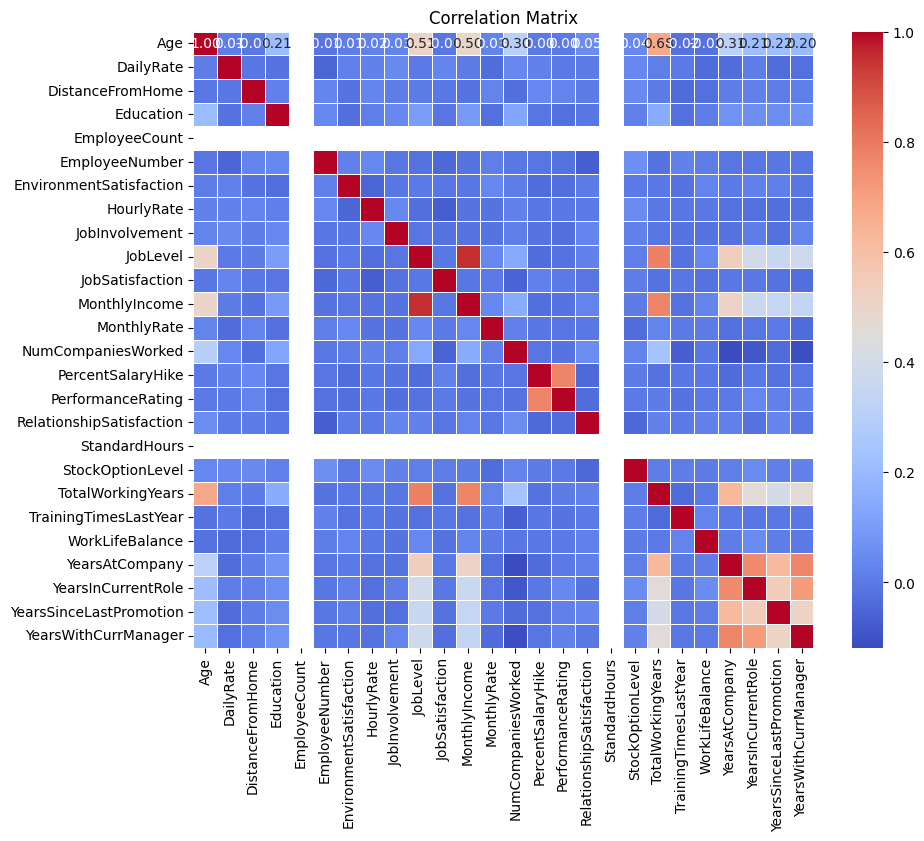

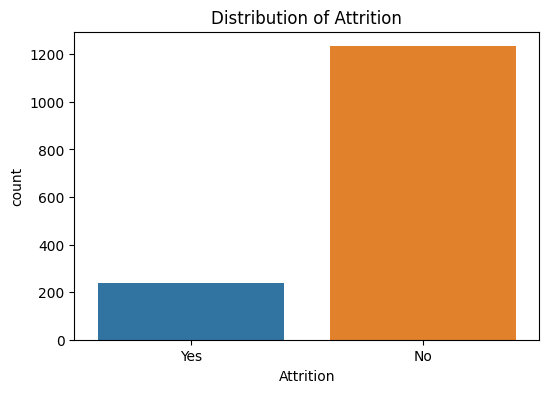

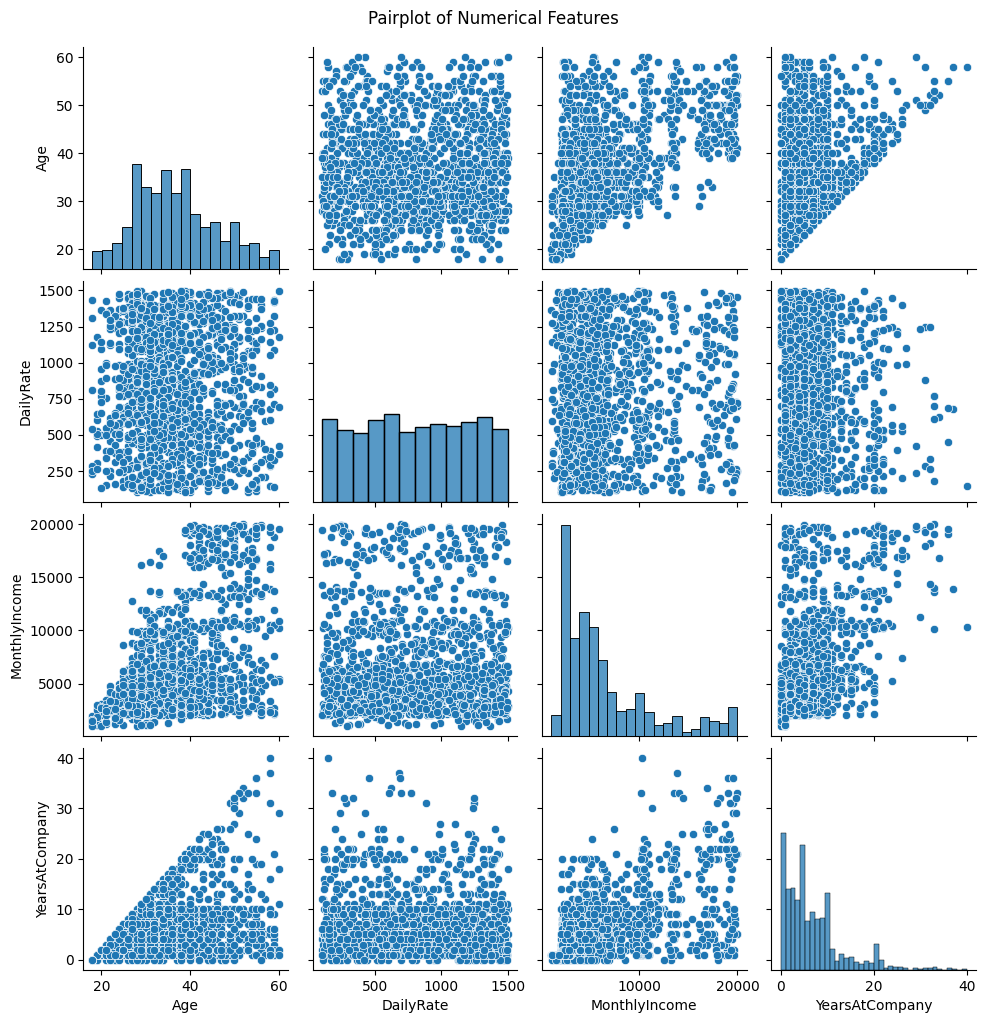

In [ ]:
#chatgpt prompt: Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check for duplicate values
print("\nDuplicate columns in the dataset:")
print(df.duplicated().any())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Distribution of target variable )
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition", data=df)
plt.title("Distribution of Attrition")
plt.show()

# Pairplot for selected numerical features
numerical_features = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany']
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

There is no missing values. There is no duplicate columns.


Some of columns can be removed, because their values do not affect the analysis results.

- **Over18**: All values are same
- **EmployeeCount**: All values are same
- **StandardHours**: All values are same
- **EmployeeNumber**: is the id of the employee that their values do not affect the analysis results.

Some of the features are correlated: like YearsatCompany, Yearsatcompany,YearsSinceLast Promotion, YearswithcurrentManager.
This might create problem while application of Naive Bayes

Data is imbalanced, the label Attrition has very low 'Yes', compared to 'No'. For evaluation just looking at Accuracy might not be enough.

In [ ]:
# remove 4 columns
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

We need to seperate categorical and numerical columns

In [ ]:
# to separate categorical and numerical columns
categorical = df.select_dtypes(['object']).columns
numerical = df.select_dtypes(['number']).columns
print(categorical)
print(numerical)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


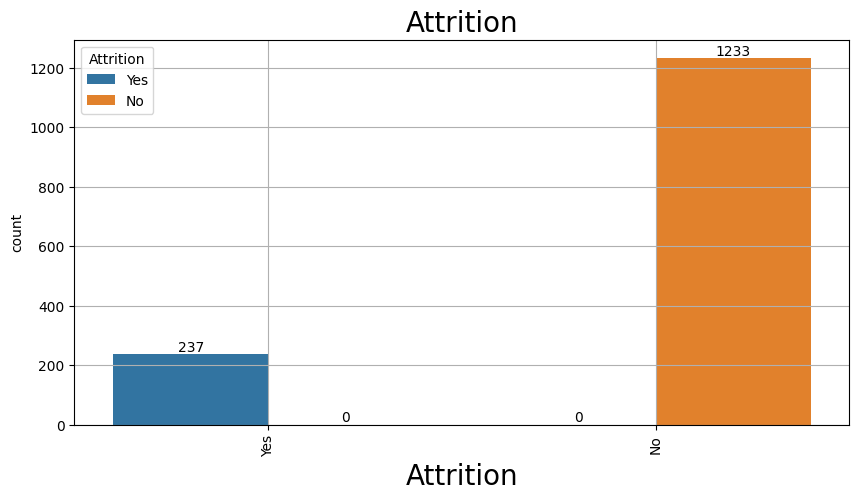

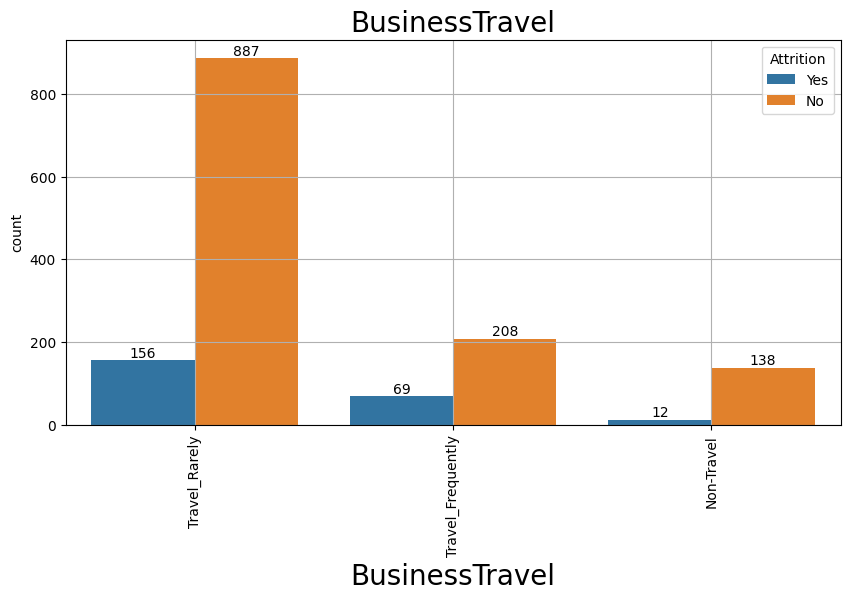

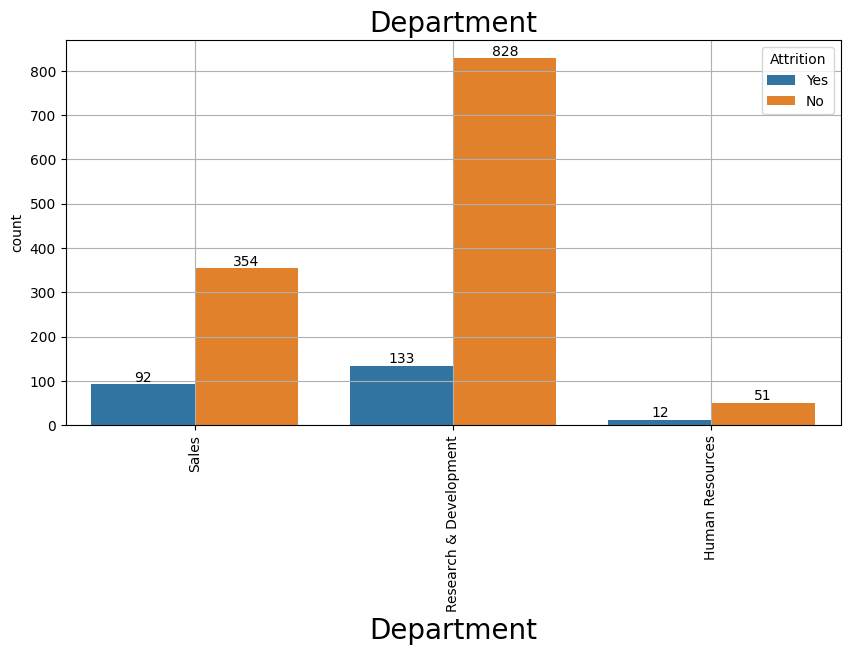

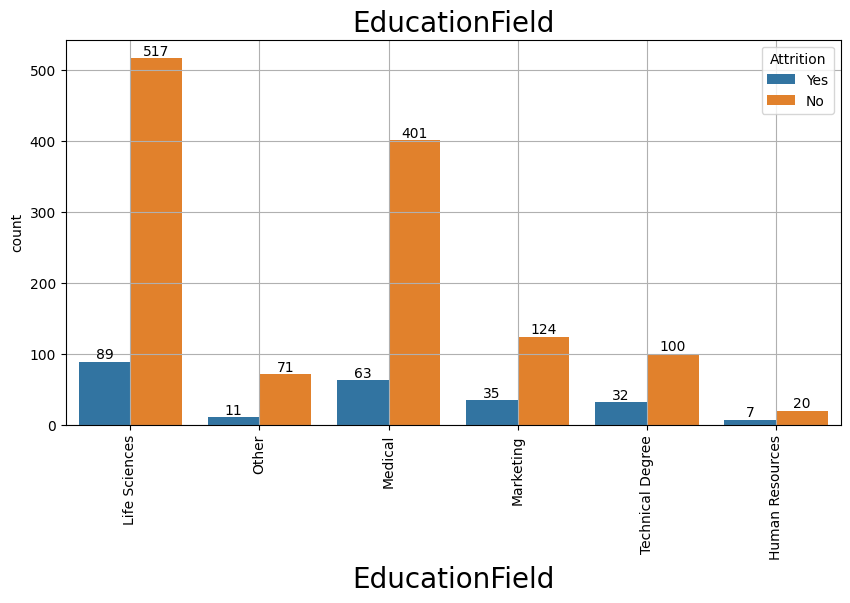

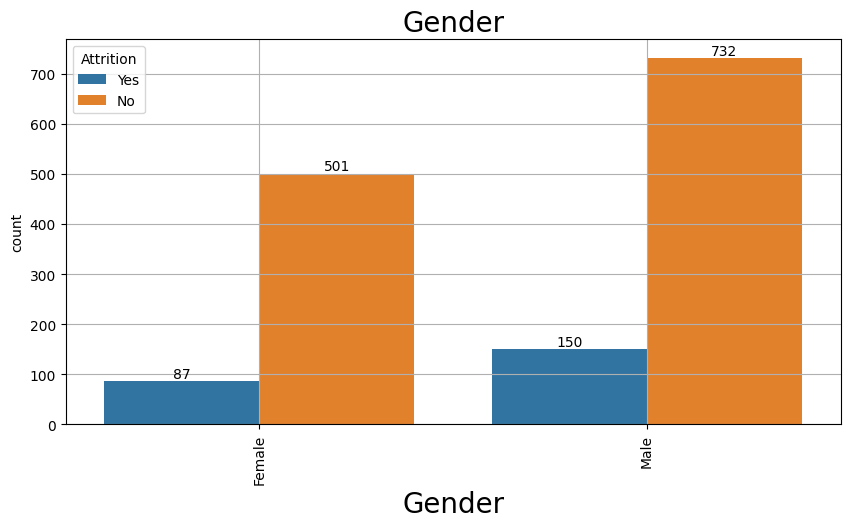

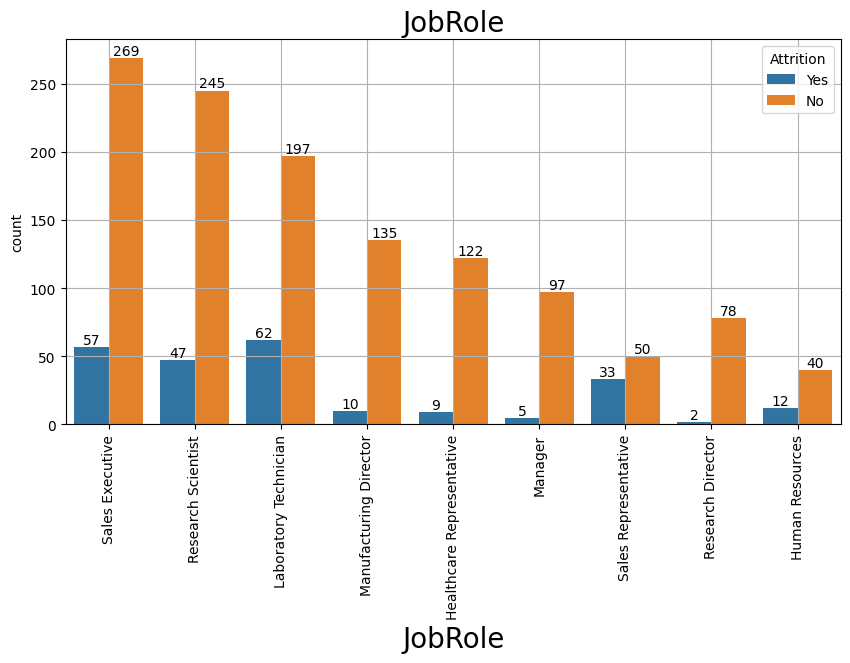

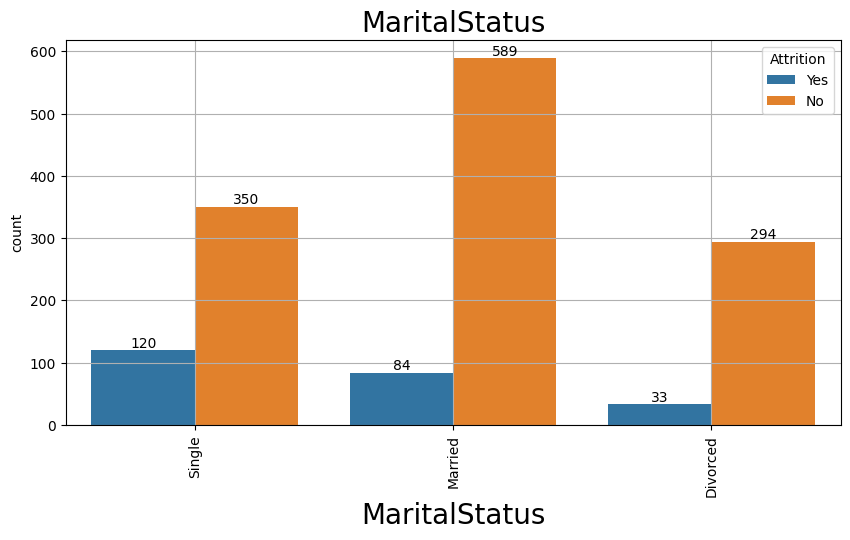

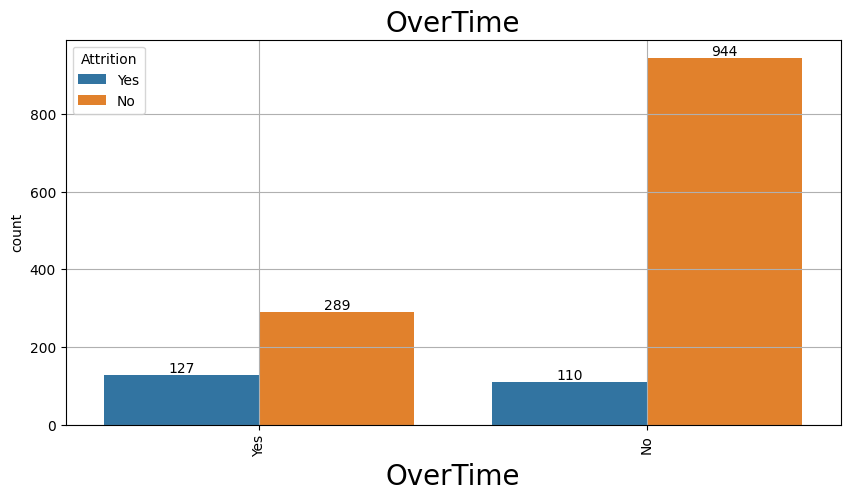

In [ ]:
# graph of categorical columns
for column in categorical:
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df, hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

The people who travel frequently have higher attrition rates.
Sales and HR have higher attrition rates compared to Research
In the job role highest attrition rate and Development.
Human Resources Educational field seems to have more attrition rate.
For the job role, highest attrition rates are for Sales Representatives followed by Laboratory Technicians.
Singles have higher attrition rates.
People who do overtime are likely to the attrition.

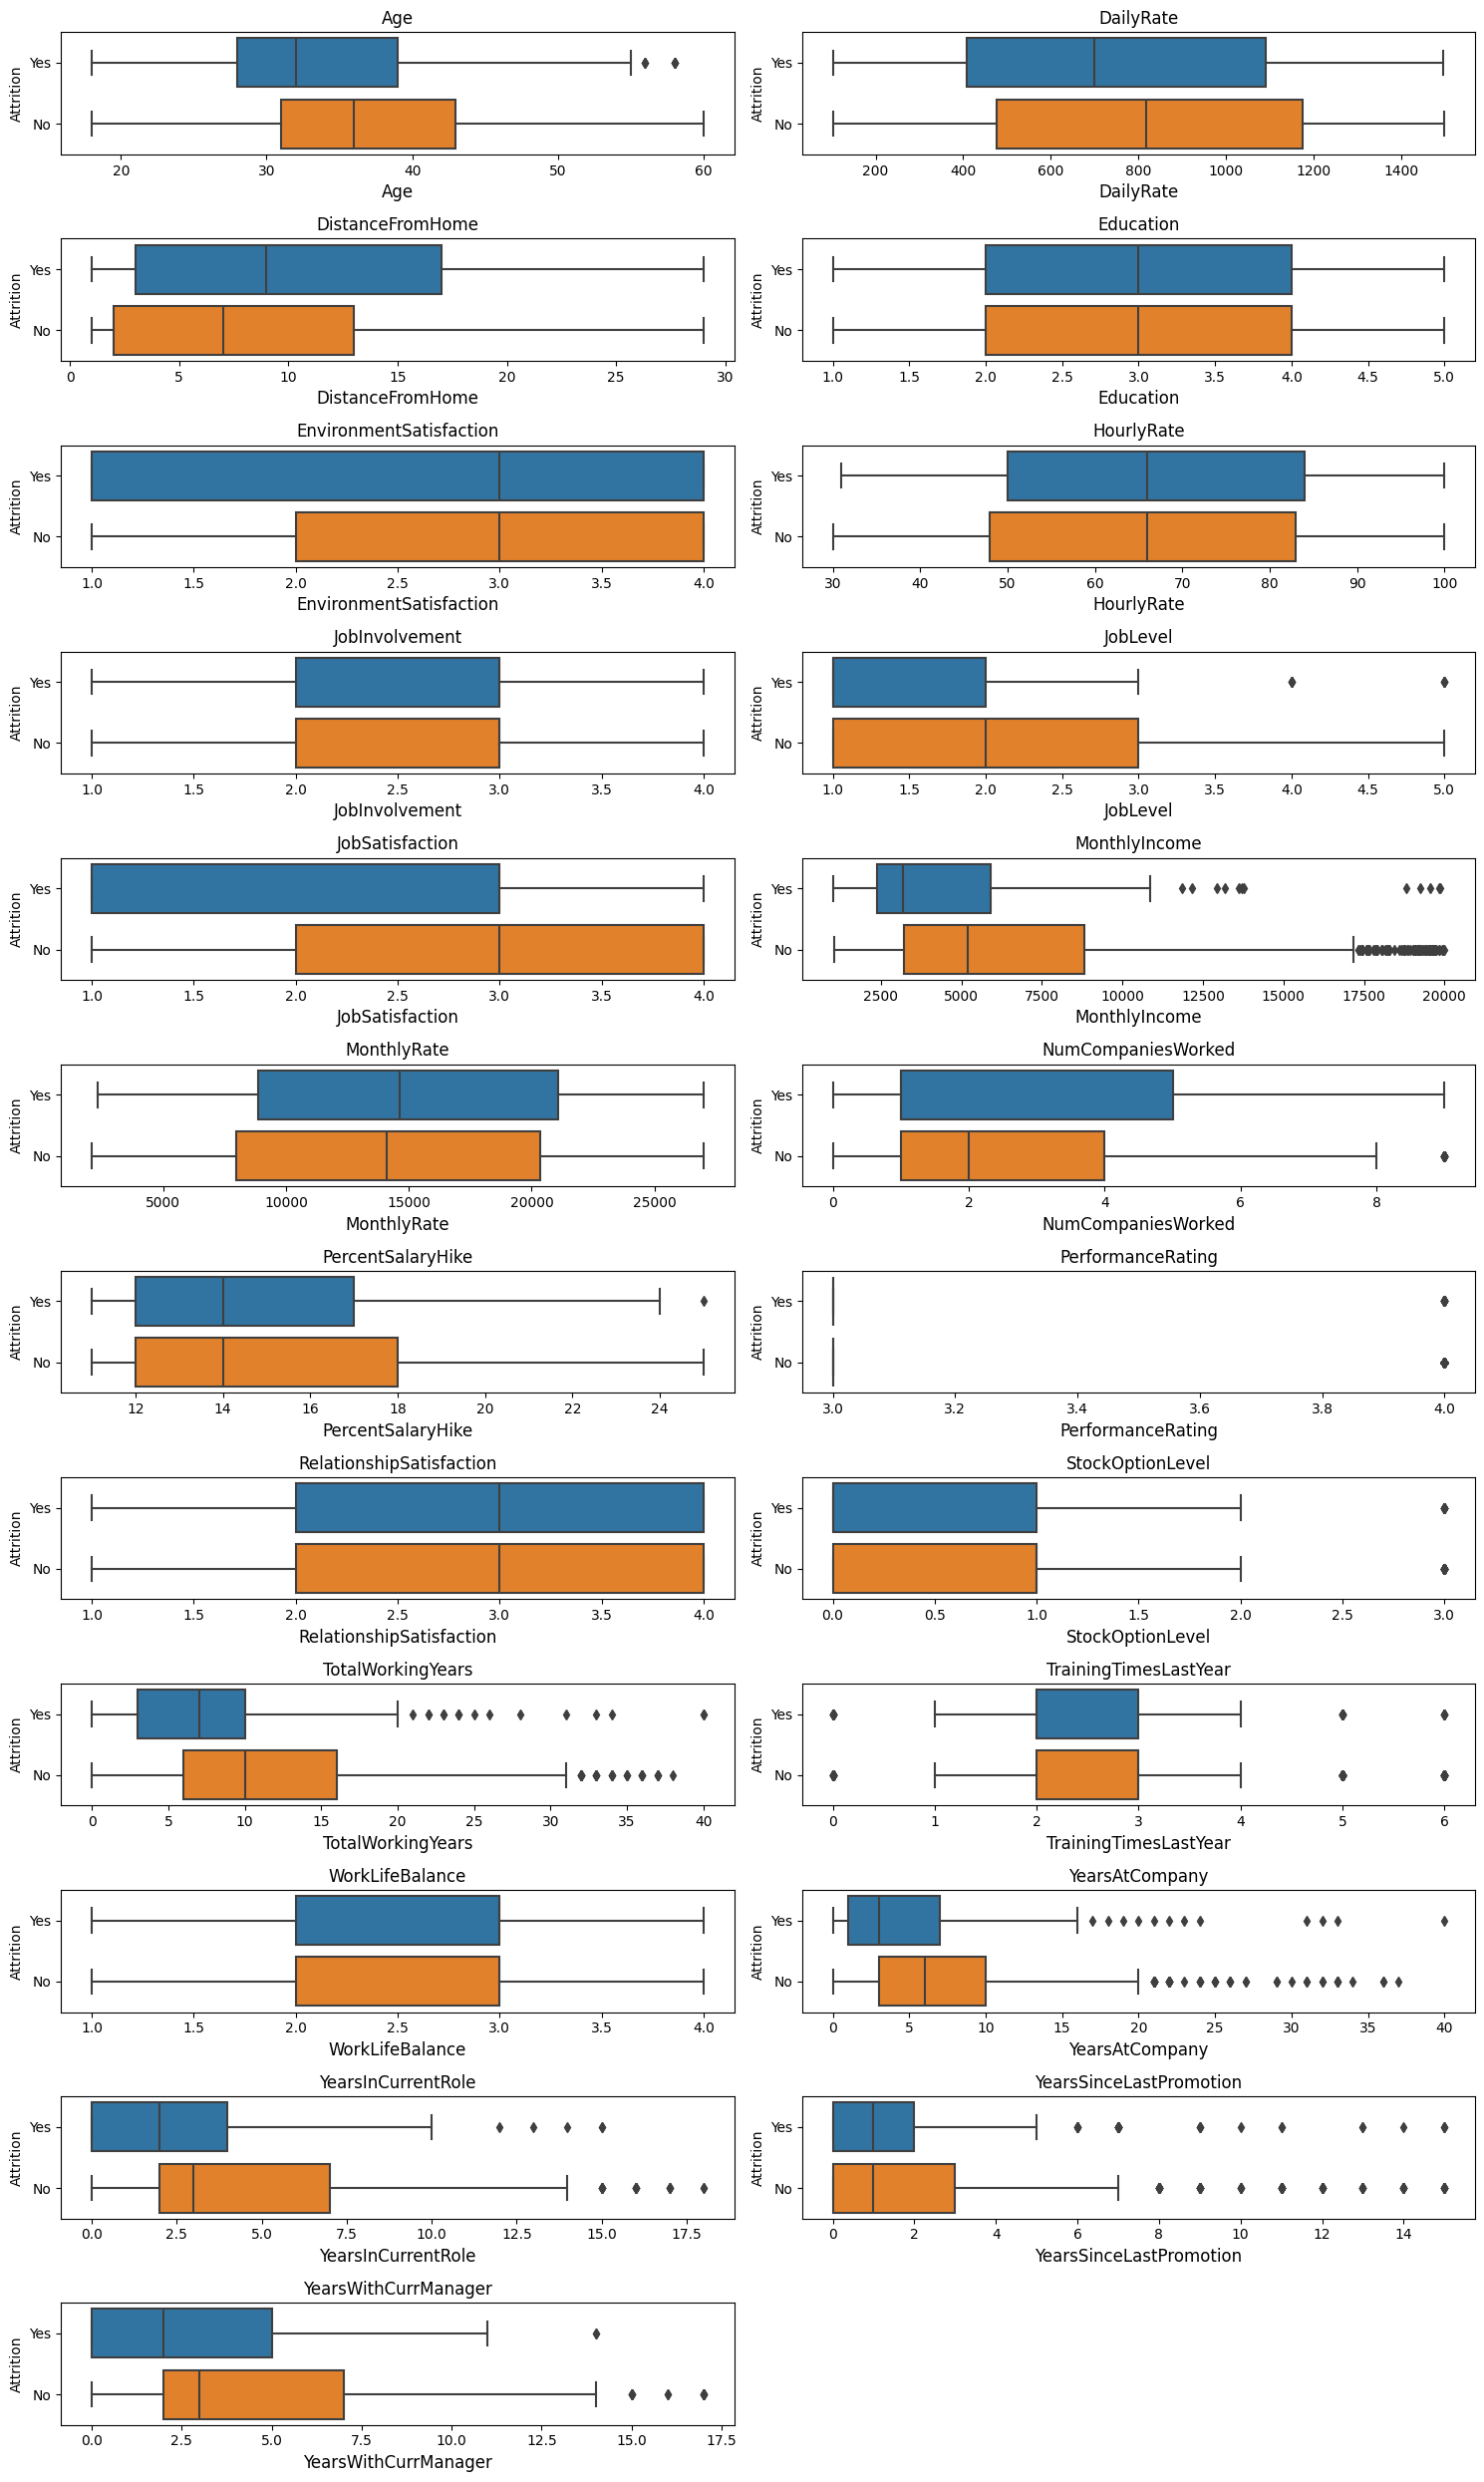

In [ ]:
# graph of numerical values
plt.figure(figsize = (15,25))
for idx, i in enumerate(numerical):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, y="Attrition", data = df)
    plt.title(i, fontsize=12)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

MonthlyIncome, Age, YearsinCurrentRole, JobSatisfaction, YearsAtCompany, DistanceFromHome, DailyRate have greater impact on Attrition.

## ML Models
4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical variables, feature scaling, and any other technique that could improve the results. [5 points]
There is no missing values.
Encoding of Categorical Variables:

In [ ]:
# chatgrpt prompt= how do we encode categorical variables in python
df_copy = df.copy()
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])

#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'EducationField',
                               'JobRole', 'Department', 'MaritalStatus'])

 feature scaling can be applied, feature scaling is applied after training and test data split. In order to not use test data, scaling is first done to train set and scaling parameters are selected, then the same scaling is applied to Test set with the same parameters.

In [ ]:
# chatgpt prompt= how do we make feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df_copy.drop('Attrition', axis=1)
y = df_copy['Attrition']
# Split data into final test set and remaining data (70/15/15 split)

# Split data into final test set and remaining data (70/15/15 split)
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.15, random_state=12345)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.18, random_state=12345)

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training features
X_remain_scaled = scaler.fit_transform(X_remain)

# Apply the same transformation to the test features
X_test_scaled = scaler.transform(X_test)
# Apply the same transformation to the train features
X_train_scaled = scaler.transform(X_train)

4. Implement 5-Fold Cross Validation to assess the robustness of your models. This approach ensures that the evaluation of your model is as accurate as possible. [5 points]
K fold splitting is applied with builtin Sklearn function, it is applied to X_remain

In [1]:
# cite course material: 3-Find best k for knn.jpynb

from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=5, shuffle=True, random_state=12345)


5. Develop and evaluate models using K-Nearest Neighbors (KNN), Naive Bayes, Perceptron, and Logistic Regression algorithms. Document the performance of each model. [30 points]

### KNN
First let's apply KNN and find hyperparameter k

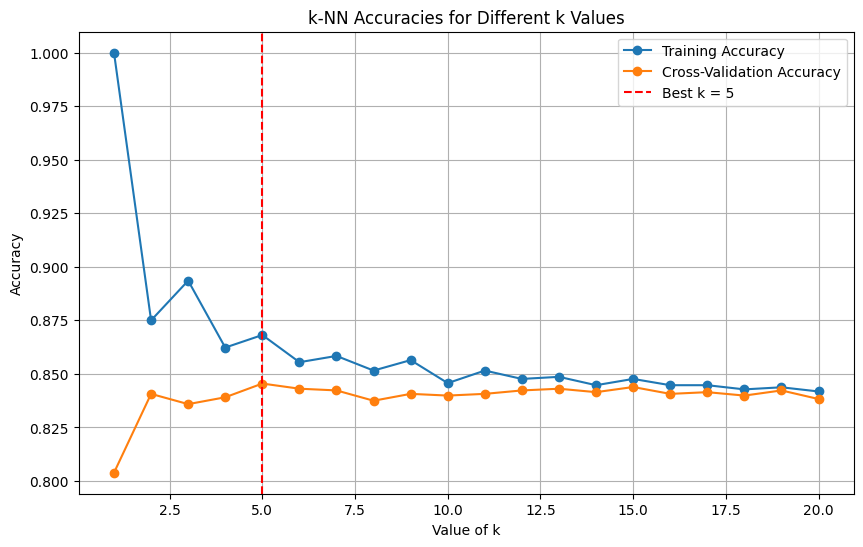

In [ ]:

#chatgpt prompt: implement k-fold in sklearn
#cite course material: 3-Find best k for knn.jpynb
from sklearn.neighbors import KNeighborsClassifier
def calculate_accuracy(y_true, y_pred):
    """Calculate accuracy given true and predicted labels."""
    return np.mean(y_true == y_pred)
cv_scores = []
train_scores = []
val_scores = []
# Loop for different k values and capture CV, train, and val scores

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    # Perform Cross Validation and get accuracy scores
    fold_scores = cross_val_score(model, X_remain_scaled, y_remain, cv=kf, scoring='accuracy')


    # Average cross-validation score
    cv_scores.append(np.mean(fold_scores))

    # Training the model on the entire training set for training accuracy
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    train_scores.append(calculate_accuracy(y_train, y_train_pred))


# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), cv_scores, label='Cross-Validation Accuracy', marker='o')

# Highlighting the best k value from CV
best_k = np.argmax(cv_scores) + 1
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')

plt.title('k-NN Accuracies for Different k Values')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Test accuracy using the best k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_remain, y_remain)
y_test_pred = model.predict(X_test)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test accuracy with KNN-best k ({best_k}): {test_accuracy:.4f}")

Test accuracy with best k (5): 0.8371


### Naive Bayes
Now let's apply naive bayes

In [ ]:
cross
model = BernoulliNB()


# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X_remain_scaled, y_remain, cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("\nMean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(cv_scores.std()))


Cross-Validation Scores:
[0.8        0.788      0.812      0.86       0.81927711]

Mean Accuracy: 81.59%
Standard Deviation: 0.02


In [ ]:
# Test accuracy using the Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test accuracy with Bernoulli Naive Bayes: {test_accuracy:.4f}")

Test accuracy with Bernoulli Naive Bayes: 0.8778


### Perceptron

Now let's apply Perceptron


In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=12345)


# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X_remain_scaled, y_remain, cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("\nMean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(cv_scores.std()))

Cross-Validation Scores:
[0.792     0.792     0.852     0.82      0.8313253]

Mean Accuracy: 81.75%
Standard Deviation: 0.02


In [ ]:
# Test accuracy using the Perceptron
model = Perceptron(random_state=12345)
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test accuracy with Perceptron: {test_accuracy:.4f}")

Test accuracy with Perceptron: 0.8597


### Logistic Regression

Now let's apply Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=12345)


# Perform Cross Validation and get accuracy scores
cv_scores = cross_val_score(model, X_remain_scaled, y_remain, cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Display the mean and standard deviation of the cross-validation scores
print("\nMean Accuracy: {:.2f}%".format(cv_scores.mean() * 100))
print("Standard Deviation: {:.2f}".format(cv_scores.std()))

Cross-Validation Scores:
[0.896      0.856      0.876      0.884      0.90361446]

Mean Accuracy: 88.31%
Standard Deviation: 0.02


In [ ]:
# Test accuracy using the Logistic Regression
model = LogisticRegression(random_state=12345)
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
test_accuracy = calculate_accuracy(y_test, y_test_pred)
print(f"Test accuracy with Logistic Regression: {test_accuracy:.4f}")

Test accuracy with Logistic Regression: 0.8959


Summary

Test accuracy with KNN-best k (5): 0.8371
Test accuracy with Bernoulli Naive Bayes: 0.8778
Test accuracy with Perceptron: 0.8597
Test accuracy with Logistic Regression: 0.8959

### Evaluation Metrics
6. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]


In [2]:
# cite course material: evaluation metrics.jpny
#chatgpt prompt: how do you calculate roc_auc evaluation for knn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Test accuracy using the best k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
print("KNN with best k")
def evalmetrics(y_test,y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix:")
    print(cm)
    print("\nTrue Positives (TP):", tp)
    print("True Negatives (TN):", tn)
    print("False Positives (FP):", fp)
    print("False Negatives (FN):", fn)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    print("\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
evalmetrics(y_test,y_test_pred)

def ROC_analysis(X_test_scaled,y_test,model):
    # Predict probabilities for the positive class
    y_scores = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate ROC curve and ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Output the AUC score
    print("ROC-AUC Score: {:.2f}".format(roc_auc_score(y_test, y_scores)))
ROC_analysis(X_test_scaled,y_test,model)

NameError: name 'KNeighborsClassifier' is not defined

the Bernoulli Naive Bayes
Confusion Matrix:
[[174  15]
 [ 12  20]]

True Positives (TP): 20
True Negatives (TN): 174
False Positives (FP): 15
False Negatives (FN): 12

Accuracy: 0.8778280542986425
Precision: 0.5714285714285714
Recall: 0.625
F1 Score: 0.5970149253731343


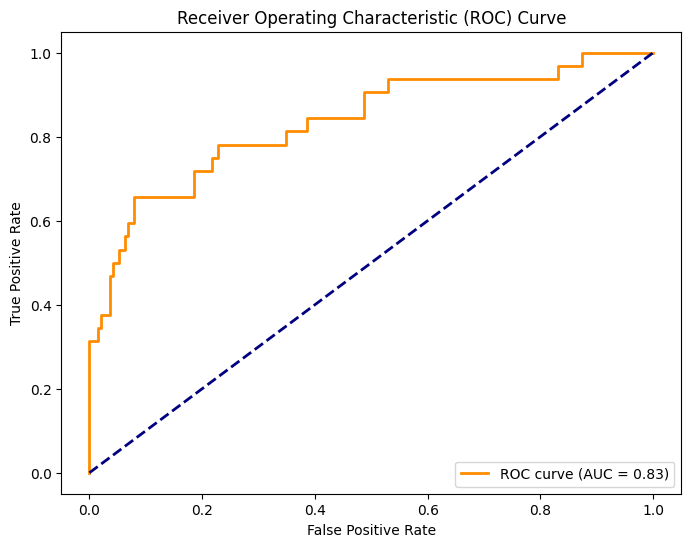

ROC-AUC Score: 0.83


In [ ]:
#  the Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
print("the Bernoulli Naive Bayes")
evalmetrics(y_test,y_test_pred)

ROC_analysis(X_test_scaled,y_test,model)

In [ ]:
# the Perceptron
print("the Perceptron")
model = Perceptron(random_state=12345)
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
evalmetrics(y_test,y_test_pred)

# no roc-au analysis for Perceptron
print("no roc-au analysis for Perceptron")

the Perceptron
Confusion Matrix:
[[173  16]
 [ 15  17]]

True Positives (TP): 17
True Negatives (TN): 173
False Positives (FP): 16
False Negatives (FN): 15

Accuracy: 0.8597285067873304
Precision: 0.5151515151515151
Recall: 0.53125
F1 Score: 0.5230769230769231
no roc-au analysis for Perceptron


the Logistic Regression 
Confusion Matrix:
[[184   5]
 [ 18  14]]

True Positives (TP): 14
True Negatives (TN): 184
False Positives (FP): 5
False Negatives (FN): 18

Accuracy: 0.8959276018099548
Precision: 0.7368421052631579
Recall: 0.4375
F1 Score: 0.5490196078431372


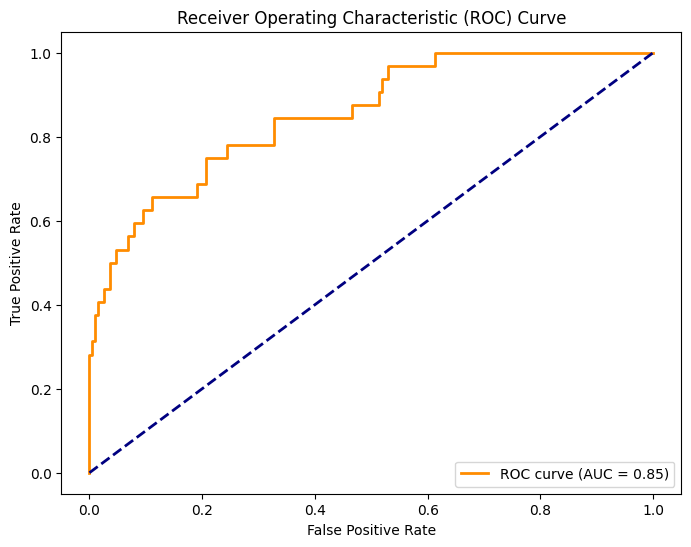

ROC-AUC Score: 0.85


In [ ]:
#  the Logistic Regression
print("the Logistic Regression ")
model = LogisticRegression(random_state=12345)
model.fit(X_remain_scaled, y_remain)
y_test_pred = model.predict(X_test_scaled)
evalmetrics(y_test,y_test_pred)

ROC_analysis(X_test_scaled,y_test,model)

8. Discuss the results. Reflect on which model yielded the best performance and hypothesize why this might be the case. Consider the algorithm’s suitability for the data distribution, complexity, and balance of the dataset. [15 points]


The highest accuracy for the algorithms is for Logistics Regression, moreover crossvalidation accuracy is highest for this model as well.

Using just accuracy metric for evaluation of our data is problematic. Because our label atrition column has distribution %90-%10 , it is imbalanced, so other evaluation metrics like Precision, Recall and F1 can be applied. We don't know the exact business conditions, which evaluation metric performs best in the scenario.

Precision:

When Precision is More Important: If the cost or impact of making a wrong positive prediction (false positive) is high, precision is a more relevant metric. High precision means that when the model predicts an employee will leave (churn), it is likely to be correct. This is important when taking actions based on the model's predictions, such as implementing retention strategies. You want to avoid investing resources in retaining employees who do not actually plan to leave.

Recall:

When Recall is More Important: If the cost or impact of missing an employee who will actually leave (false negative) is high, recall becomes more critical. High recall means the model is good at identifying most of the employees who are likely to leave. In scenarios where missing potential churners has significant consequences, such as losing valuable employees, recall is a key metric.

F1-Score:

Balancing Precision and Recall: The F1-score, which is the harmonic mean of precision and recall, can be a good choice when there is a need to balance the trade-off between false positives and false negatives. It provides a single metric that considers both types of errors.

ROC AUC Curve:

The ROC AUC curve evaluates the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across various probability thresholds.
It provides insights into the model's ability to distinguish between the positive and negative classes. A higher AUC indicates better model performance.

For KNN

Accuracy: 0.8642533936651584
Precision: 0.6666666666666666
Recall: 0.125
F1 Score: 0.21052631578947367

Since our data is imbalanced, there are very limited number of Atrition Yes labels. This makes very few points are labeled as yes. Out of 201 points in test set only 6 of them is labeld as yes for atrition which is lower proportion than general atrition rates. F1 and Recall scores are very bad compared to other model.

For Naive Bayes

Accuracy: 0.8778280542986425
Precision: 0.5714285714285714
Recall: 0.625
F1 Score: 0.5970149253731343

Although Acurracy for the test set is 87.7%, cross validation accuracy mean is 81%. Recall and F1 scores are highest for this set, but cross validation results does not predict test outcome.
Some of the features in our dataset was corelated, May be this algorithm was not best fit for a model in this dataset.

Perceptron

Accuracy: 0.8597285067873304
Precision: 0.5151515151515151
Recall: 0.53125
F1 Score: 0.5230769230769231

Perceptron

Logistic Regression
Accuracy: 0.8959276018099548
Precision: 0.7368421052631579
Recall: 0.4375
F1 Score: 0.5490196078431372

For Accuracy and Precision Logistic Regression performs best, but for Recall it is not working as good as Naive Bayes.But Roc_AUC analysis gives best results for this algorithm

Balance of Dataset

Logistic Regression and Naive Bayes are relatively robust to imbalanced datasets.
KNN and Perceptron may require adjustments to handle imbalances effectively. Which our evaluatiıon metrics show, for these two algorithms results are not that great


Suitability for Data Distribution:

KNN is a non-parametric algorithm that makes predictions based on the majority class of the k-nearest neighbors.
Well-suited for both linear and non-linear data distributions.
Sensitive to the local structure of the data.

Naive Bayes assumes that features are conditionally independent given the class. Our data has corelated featues
Works well with both linear and non-linear data distributions.
Particularly effective for high-dimensional datasets. Our data set is high dimensional

Perceptron is a linear classifier and works well when the data is linearly separable.
Can struggle with complex, non-linear relationships. Our data is linearly seperable, algorithm converge in finite steps. But we are not sure we have linear sperating plane.

Logistic Regression models the probability of the positive class and can handle linear and non-linear relationships.
Works well when the decision boundary is a hyperplane.

Complexity

KNN can be computationally expensive, especially with large datasets, as it requires calculating distances between data points.
The choice of the number of neighbors (k) impacts the algorithm's complexity. Our data is not that big, so this did not create a problem.

Naive Bayes is computationally efficient and has low complexity, making it suitable for large datasets.

Perceptron Simple and computationally efficient, especially for online learning scenarios.
Suitable for problems with a moderate number of features. We have large number features

Logistic Regression is relatively simple and interpretable.
Can handle a large number of features.
chatgpt prompt: define evaluation metrics for atrition prblem
chatgpt prompt: compare algorithms Naive Bayes,perceptron, KNN and logistic regresion for imabalanced data, complexity and suitability of distribution


## Part II: Gradient Descent Implementation
1. The ”Vehicle Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
2. Implement the gradient descent algorithm without using of any libraries
except for Pandas and NumPy. [10 points]
3. How many iteration step needs to converge with learning rate [0.01, 0.1,
1]? Devise an intelligent strategy for choosing the learning rate to reduce
the number of iterations required for convergence. Show how the learning
rate that you propose impacts the convergence of the gradient descent
algorithm. Show on the graph how the cost function changes with the
number of iterations and how the gradient descent converges. [20 points]


## Data Download
1. The ”Vehicle Dataset” should be downloaded from the Kaggle website: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [ ]:
import os
# Assuming the dataset is a CSV file, adjust the file name accordingly
csv_file_path = os.path.join( "car data.csv")

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame (df)
# For example, you can print the first few rows of the dataset
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


## Application of Gradient Descent
2. Implement the gradient descent algorithm without using of any libraries except for Pandas and NumPy. [10 points]

Theta (intercept and slope): [[-0.50545674]
 [ 0.98868889]]


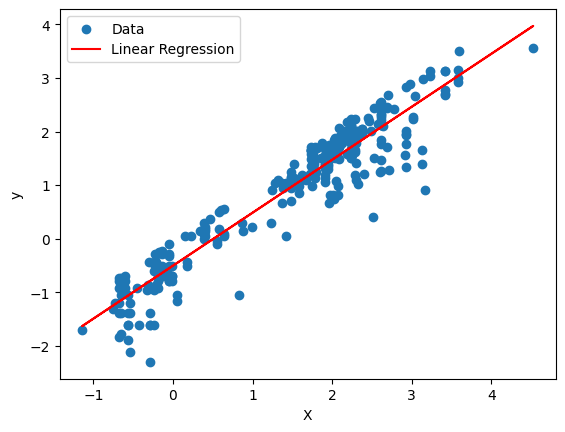

In [ ]:

import pandas as pd
import numpy as np
X = np.array(df['Present_Price']).reshape(-1, 1)
y = np.array(df['Selling_Price']).reshape(-1, 1)

X = np.log(X)
y = np.log(y)

# Linear regression using gradient descent
#chatgpt command Implement the gradient descent algorithm without using of any libraries except for Pandas and NumPy.
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    X_b = np.c_[np.ones((m, 1)), X]  # add bias term
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients



    return theta




# Run gradient descent
theta = gradient_descent(X, y)

# Display the results
print("Theta (intercept and slope):", theta)
import matplotlib.pyplot as plt
# Plot the data and the linear regression line
plt.scatter(X, y, label='Data')
plt.plot(X, X.dot(theta[1]) + theta[0], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Application of Adam Algorithm and Convergence Rates

3. How many iteration step needs to converge with learning rate [0.01, 0.1, 1]? Devise an intelligent strategy for choosing the learning rate to reduce the number of iterations required for convergence. Show how the learning rate that you propose impacts the convergence of the gradient descent algorithm. Show on the graph how the cost function changes with the number of iterations and how the gradient descent converges. [20 points]

How many iteration step needs to converge with learning rate [0.01, 0.1, 1]?

In [ ]:
# Linear regression using gradient descent with convergence tracking
epsilon=1e-8
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    X_b = np.c_[np.ones((m, 1)), X]  # add bias term
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta_old=theta
        theta = theta - learning_rate * gradients
        # Convergence check
        if np.linalg.norm(theta_old - theta) < epsilon:
            print(f"learning_rate: {learning_rate} Converged at iteration {iteration}. Theta: {theta.flatten()}")
            break
        if iteration==n_iterations-1:
             print(f"learning_rate: {learning_rate} Failed to converge")


    return theta


# Learning rates to experiment with
learning_rates = [0.01, 0.1, 1]
for eta in learning_rates:
    gradient_descent(X, y, eta,2000)


learning_rate: 0.01 Converged at iteration 1924. Theta: [-0.50513118  0.98854244]
learning_rate: 0.1 Converged at iteration 225. Theta: [-0.50513233  0.98854296]
learning_rate: 1 Failed to converge


Since learning rate=1 begins to make very big steps, the iteration number is adjusted. It does not converge in the end. It overshoots
Learning_rete=0.01 is very small steps, so it convergence takes longer times
learning_rate: 0.1 is the best learning speed.

Devise an intelligent strategy for choosing the learning rate to reduce the number of iterations required for convergence. Show how the learning rate that you propose impacts the convergence of the gradient descent algorithm. Show on the graph how the cost function changes with the number of iterations and how the gradient descent converges.

learning_rate: 0.1 Converged at iteration 5384. Theta: [-0.50512889  0.98854112]
learning_rate: 0.5 Converged at iteration 138. Theta: [-0.50513238  0.98854297]
learning_rate: 1 Converged at iteration 108. Theta: [-0.5051324   0.98854298]


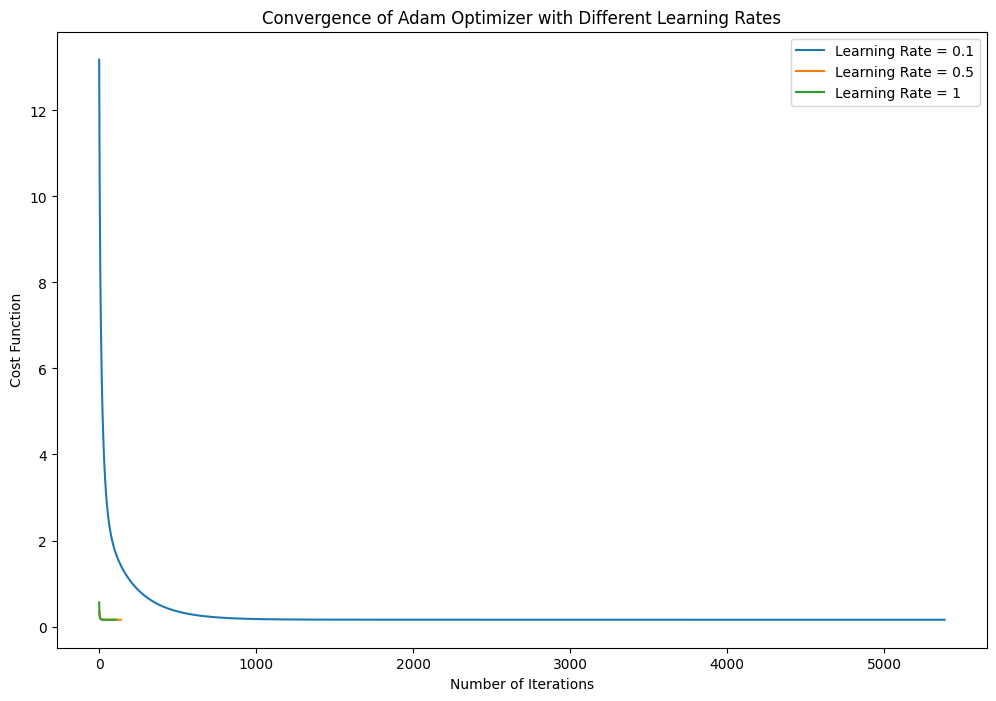

In [ ]:

#chatgpt prompt apply adam algorithm to gradient descent
# Linear regression using Adam algorithm with convergence check
def adam_optimizer(X, y, learning_rate=0.001, epsilon=1e-8, n_iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # random initialization
    s_t = np.zeros_like(theta)
    X_b = np.c_[np.ones((m, 1)), X]  # add bias term
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        s_t = s_t + (gradients ** 2)


        theta_old = theta
        theta = theta - learning_rate/np.sqrt(s_t+1e-8)  * gradients

        # Calculate and record the cost function
        cost = np.mean((X_b.dot(theta) - y) ** 2)
        cost_history.append(cost)

        # Convergence check
        if np.linalg.norm(theta_old - theta) < epsilon:
            print(f"learning_rate: {learning_rate} Converged at iteration {iteration}. Theta: {theta.flatten()}")
            break
        if iteration==n_iterations-1:
             print(f"learning_rate: {learning_rate} Failed to converge")

    return theta, cost_history
# Learning rates to experiment with
learning_rates = [0.1,0.5, 1]

# Plot the convergence for each learning rate
plt.figure(figsize=(12, 8))

for eta in learning_rates:
    final_theta, cost_history = adam_optimizer(X, y, learning_rate=eta, n_iterations=10000)

    # Plot cost function over iterations
    plt.plot(range(1, len(cost_history) + 1), cost_history, label=f'Learning Rate = {eta}')

plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function')
plt.title('Convergence of Adam Optimizer with Different Learning Rates')
plt.legend()
plt.show()
